In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
data=pd.read_csv('C:/Users/manas/Downloads/wine+quality/winequality-red.csv')

In [50]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
X = data.drop(columns=['Unnamed: 0', 'quality'])
y = data['quality']

In [51]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

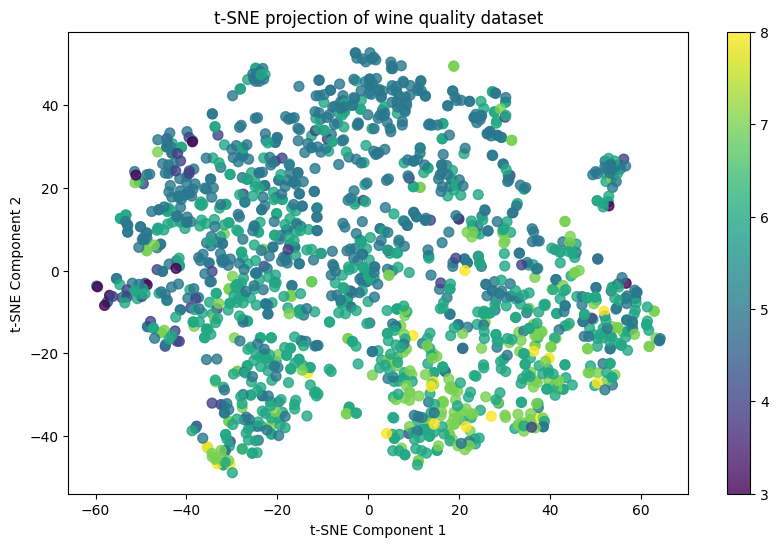

In [52]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=50, alpha=0.8)
plt.colorbar(scatter)
plt.title("t-SNE projection of wine quality dataset")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

models = {
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10]
        }
    },
    "SVM": {
        "model": SVC(random_state=42),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"],
            "gamma": ["scale", "auto"]
        }
    }
}

best_model = None
best_score = 0
best_params = None
model_name = None

for name, config in models.items():
    grid = GridSearchCV(config["model"], config["params"], cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train, y_train)
    
    if grid.best_score_ > best_score:
        best_model = grid.best_estimator_
        best_score = grid.best_score_
        best_params = grid.best_params_
        model_name = name

y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)




In [72]:
print(
    "Best Model:", model_name,
    "\nBest Hyperparameters:", best_params,
    "\nTraining Accuracy:", best_score,
    "\nTest Accuracy:", test_accuracy)


Best Model: Random Forest 
Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100} 
Training Accuracy: 0.6817738970588235 
Test Accuracy: 0.690625
